### Contents
Creating a Tensor with Gradients<br>

In [22]:
import torch
from torch import Tensor
import matplotlib.pyplot as plt


def plot_data(x: list[float], y: list[float]):
    ax = plt.subplots()[1]
    #plt.plot(x, y)
    #plt.show()
    ax.scatter(x, y, color='red')


def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

In [2]:
def get_total_height(step: Tensor) -> Tensor:
    return 8*step

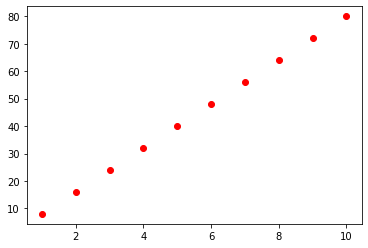

In [23]:
steps = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
heights = [get_total_height(step) for step in steps]

plot_data(steps, heights)

### Gradients on the Crazy Stairs

In [25]:
def get_total_height_crazy(step: Tensor, verbose: bool=False) -> Tensor:
    step_int = int(step.item())
    total_height = torch.tensor(0, dtype=torch.float16, requires_grad=True)
    for previous in range(step_int):
        step_height = (step-previous)*4
        total_height = total_height + step_height
        if verbose:
            print(f'Step: {step-previous}\tStep height: {step_height}\tTotal Height: {total_height}')
    return total_height

step = 4
total_height = get_total_height_crazy(torch.tensor(step), verbose=True)
print(f'Total height at step {step}:', total_height)

Step: 4	Step height: 16	Total Height: 16.0
Step: 3	Step height: 12	Total Height: 28.0
Step: 2	Step height: 8	Total Height: 36.0
Step: 1	Step height: 4	Total Height: 40.0
Total height at step 4: tensor(40., dtype=torch.float16, grad_fn=<AddBackward0>)


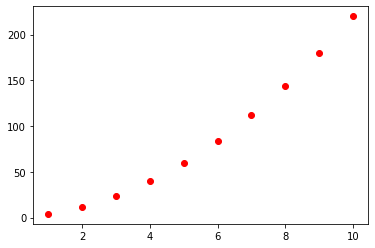

In [26]:
steps = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
heights = [get_total_height_crazy(torch.tensor(step)).detach().numpy() for step in steps]

plot_data(steps, heights)

In [4]:
step = 4
step_tensor = torch.tensor(step, dtype=torch.float16)
step_tensor.requires_grad_()

print(step_tensor)

tensor(4., dtype=torch.float16, requires_grad=True)


In [12]:
height_tensor = get_total_height_crazy(step_tensor)

print('height_tensor:', height_tensor)
print('requires_grad:', height_tensor.requires_grad)

height_tensor: tensor(20., dtype=torch.float16, grad_fn=<AddBackward0>)
requires_grad: True


In [6]:
height_tensor.backward()

print('step_tensor:', step_tensor)
print('height_tensor:', height_tensor)
print('step_tensor.grad:', step_tensor.grad)

step_tensor: tensor(4., dtype=torch.float16, requires_grad=True)
height_tensor: tensor(20., dtype=torch.float16, grad_fn=<AddBackward0>)
step_tensor.grad: tensor(8., dtype=torch.float16)


In [6]:
def f(x):
    #return 5 * x**3 + 2 * x**2 + 10
    return 2*x+5
f(torch.tensor(3))

tensor(11)

Notes:<br>
There is a difference between torch.tensor() and torch.Tensor()<br>
All data in a tensor with gradients has to be a float.

In [7]:
weights = 4
x = torch.tensor(weights, dtype=torch.float32)
x.requires_grad_()
y = f(x)
y.backward()

print(x)
print(y)
print(x.grad)


tensor(4., requires_grad=True)
tensor(13., grad_fn=<AddBackward0>)
tensor(2.)
